In [6]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
path = 'yelp_data/health_text_sentiment.csv'

In [14]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)


df = df[['stars',
 'clean_text',
 'sent_value_clean',
 'sent_score_clean']]

In [13]:
data.head()

,stars,clean_text,sent_value_clean,sent_score_clean
0,1,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,husband patient dr byrne last year half last m...,0.069479,positive
2,4,dr byrne great doctor great bed side manner ex...,0.317778,positive
3,3,raise review dr bryne receptive daughter go an...,0.002806,positive
4,1,wish could give star bad office ever horrible ...,-0.084259,negative


## split 1 and 5 stars

In [15]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
data.stars.replace(1,0,inplace=True)
data.stars.replace(5,1,inplace=True)

data.head()

,stars,clean_text,sent_value_clean,sent_score_clean
0,0,please stay away place bad care imaginable sta...,-0.036719,negative
1,1,husband patient dr byrne last year half last m...,0.069479,positive
4,0,wish could give star bad office ever horrible ...,-0.084259,negative
5,0,go emergency room kidney stone attack emergenc...,0.133618,positive
6,1,dr byrne excellent doctor right skill include ...,0.210708,positive


## Vectorize reviews


In [16]:
# split
review = data['clean_text'].values.astype(str)
sentiments = data['stars'].values

In [18]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(review)

CPU times: user 19.9 s, sys: 1.92 s, total: 21.8 s
Wall time: 19.5 s


In [20]:
from sklearn.model_selection import train_test_split
# attention: we now use vectorize reviews, not the reviews column!!
X_train, X_test, y_train, y_test = train_test_split(vectors, sentiments,
 test_size=0.33, random_state=42)

In [21]:
from sklearn.svm import LinearSVC

# SVM classifier
classifier = LinearSVC()

# train
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [22]:
# lets make our predictions
preds = classifier.predict(X_test)

## Evaluate



In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.9767008913460453


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      7241
          1       0.98      0.98      0.98     10485

avg / total       0.98      0.98      0.98     17726



## Confusion matrix

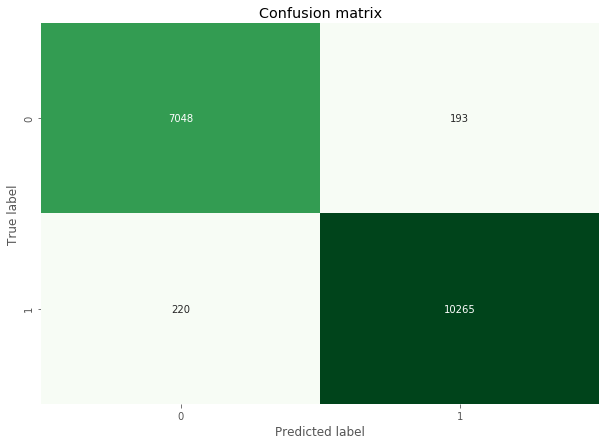

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Display Coefficients

In [56]:
feature_names = np.array(vectorizer.get_feature_names())
sorted_coef_index = classifier.coef_[0].argsort()

print('Lowest 10  Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Highest 10 Coef: \n{}\n'.format(feature_names[sorted_coef_index][-10:]))

Lowest 10  Coef: 
['rude' 'not' 'tell' 'horrible' 'not recommend' 'unprofessional'
 'terrible' 'bad' 'disappointed' 'refuse']

Highest 10 Coef: 
['happy' 'wonderful' 'awesome' 'dr' 'love' 'good' 'friendly' 'thank'
 'amazing' 'great']



# plot

In [60]:
#https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    #plt.title('asdf')
    plt.show()

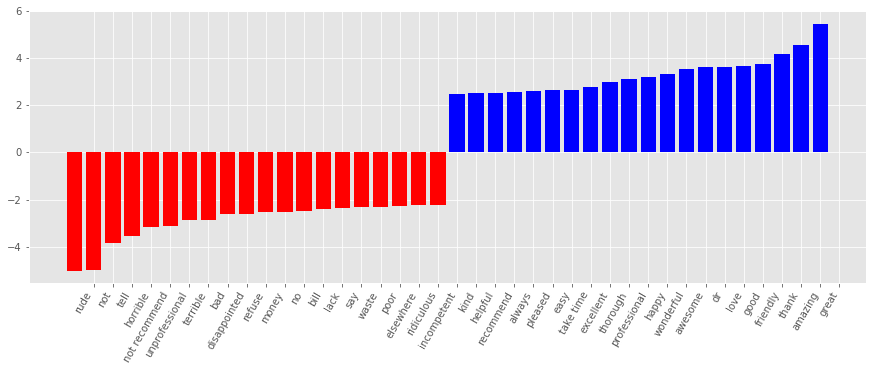

In [61]:
plot_coefficients(classifier, vectorizer.get_feature_names())

## Try All star revies

In [62]:
data2 = df.copy()

In [63]:
%%time
review = data2['clean_text'].values.astype(str)
sentiments = data2['stars'].values

CPU times: user 219 ms, sys: 1.31 s, total: 1.53 s
Wall time: 1.54 s


In [64]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(review)

CPU times: user 24.7 s, sys: 2 s, total: 26.7 s
Wall time: 24.2 s


In [65]:
from sklearn.model_selection import train_test_split
# attention: we now use vectorize reviews, not the reviews column!!
X_train, X_test, y_train, y_test = train_test_split(vectors, sentiments,
 test_size=0.33, random_state=42)

In [66]:
from sklearn.svm import LinearSVC

# SVM classifier
classifier = LinearSVC()

# train
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [67]:
# lets make our predictions
preds = classifier.predict(X_test)

# Evaluate

In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.8270523624656756


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.81      0.97      0.88      7239
          2       0.44      0.07      0.11      1242
          3       0.49      0.05      0.09       768
          4       0.46      0.12      0.19      1439
          5       0.86      0.98      0.92     10434

avg / total       0.78      0.83      0.78     21122



## Confusion matrix

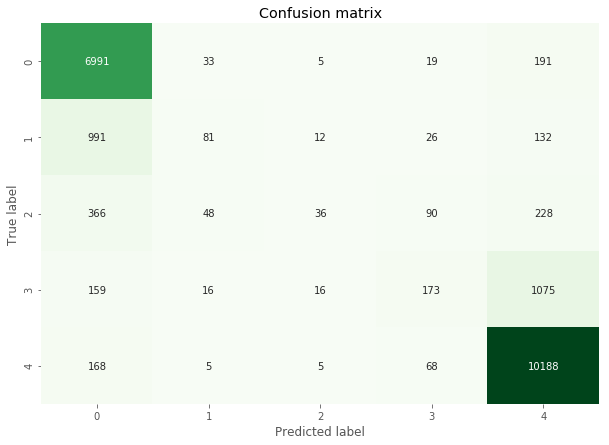

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Result Original text review : SVC

### 1 & 5 stars
- accuracy score: 0.9767008913460453


### 1 - 5 stars
- accuracy score: 0.8270523624656756